<a href="https://colab.research.google.com/github/ziyuliuzilla/Causal-Analysis-with-A-B-Testing/blob/main/Statistical_Inference_of_A_B_Testing_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Causal Effect Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
organic_df = pd.read_excel('/content/Organic.xlsx')
non_df = pd.read_excel('/content/Non-organic.xlsx')

In [ ]:
df = pd.concat([organic_df, non_df])

In [ ]:
non_df.describe()

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
count,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.0,2.351648,5.857143,6.835165,2.263736,2.637363,2.186813
std,0.0,1.214483,2.938524,2.473251,1.103884,0.900820,0.868103
min,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.0,1.000000,4.000000,5.000000,1.000000,2.000000,2.000000
50%,0.0,2.000000,6.000000,7.000000,2.000000,2.000000,2.000000
75%,0.0,3.000000,8.000000,9.000000,3.000000,3.000000,3.000000
max,0.0,5.000000,10.000000,10.000000,5.000000,5.000000,4.000000


In [ ]:
organic_df.describe()

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
count,95.0,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1.0,2.221053,6.663158,7.221053,2.315789,2.778947,2.010526
std,0.0,1.247798,2.973681,2.626295,1.132340,0.980436,0.844188
min,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,1.000000,5.000000,6.000000,1.000000,2.000000,1.000000
50%,1.0,2.000000,8.000000,8.000000,2.000000,2.000000,2.000000
75%,1.0,3.000000,9.000000,9.000000,3.000000,3.500000,3.000000
max,1.0,5.000000,10.000000,10.000000,5.000000,5.000000,4.000000


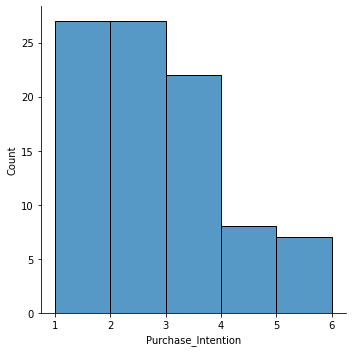

In [ ]:
# see distribution
distribution1 = sns.displot(non_df,x='Purchase_Intention',bins=[1, 2, 3, 4, 5,6])

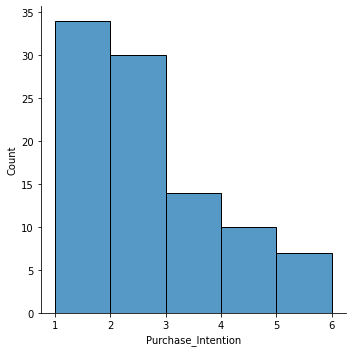

In [ ]:
# see distribution
distribution1 = sns.displot(organic_df,x='Purchase_Intention',bins=[1, 2, 3, 4, 5,6])

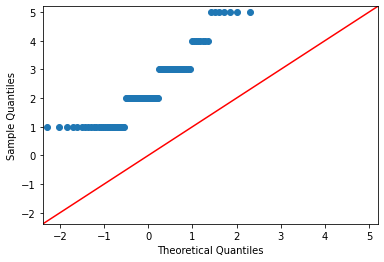

In [ ]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(non_df['Purchase_Intention'], line='45')
plt.show()

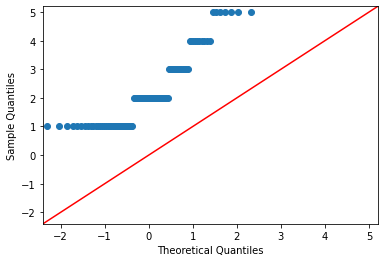

In [ ]:
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(organic_df['Purchase_Intention'], line='45')
plt.show()

## Organic to Purchase Intention 
*   2-sample T-test
*   One-way ANOVA

*   Mann-Whitney test








In [ ]:
from scipy import stats

In [ ]:
stats.shapiro(non_df['Purchase_Intention'])
# the null hypothesis is that the data follows a normal distribution
# not follow normal distribution

ShapiroResult(statistic=0.8695838451385498, pvalue=1.971831693481363e-07)

In [ ]:
stats.shapiro(organic_df['Purchase_Intention'])
# the null hypothesis is that the data follows a normal distribution
# not follow normal distribution

ShapiroResult(statistic=0.836064875125885, pvalue=7.1934422862796055e-09)

In [ ]:
stats.levene(non_df['Purchase_Intention'], organic_df['Purchase_Intention'])
# equal variance

LeveneResult(statistic=0.004425453477965599, pvalue=0.9470328126042259)

In [ ]:
# 2-sample t-test
res = stats.ttest_ind(non_df['Purchase_Intention'], organic_df['Purchase_Intention'], equal_var=True)

display(res)

# p-value > 0.05, the difference between the 2 sample means is zero

Ttest_indResult(statistic=0.7229028874505221, pvalue=0.47065743027333196)

In [ ]:
# one-way ANOVA
from scipy.stats import f_oneway
f_oneway(non_df['Purchase_Intention'], organic_df['Purchase_Intention'])

# p-value > 0.05, no difference between 2 groups

F_onewayResult(statistic=0.5225885846843, pvalue=0.47065743027332585)

In [ ]:
# Mann-Whitney test

from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(non_df['Purchase_Intention'], organic_df['Purchase_Intention'])
results

# p-value > 0.05, no difference between 2 groups

MannwhitneyuResult(statistic=4648.5, pvalue=0.3571086327768541)

## Organic to Nutrition Perception


*   2-sample T-test



In [ ]:
stats.shapiro(non_df['Nurtion_Perception'])
# the null hypothesis is that the data follows a normal distribution
# follow normal distribution

ShapiroResult(statistic=0.9368333220481873, pvalue=0.000258521584328264)

In [ ]:
stats.shapiro(organic_df['Nurtion_Perception'])
# the null hypothesis is that the data follows a normal distribution
# follow normal distribution

ShapiroResult(statistic=0.8897076845169067, pvalue=8.257550234702649e-07)

In [ ]:
stats.levene(non_df['Nurtion_Perception'], organic_df['Nurtion_Perception'])
# equal variance

LeveneResult(statistic=0.0823315238299806, pvalue=0.774485175908113)

In [ ]:
# 2-sample t-test
res2 = stats.ttest_ind(non_df['Nurtion_Perception'], organic_df['Nurtion_Perception'], equal_var=True, alternative='less')

display(res2)

# p-value < 0.05, organic is higer than non-organic

Ttest_indResult(statistic=-1.8585999576033703, pvalue=0.032340513679585584)

## Organic to Item Preference


*   2-sample T-test



In [ ]:
stats.shapiro(non_df['Item_Preference'])
# the null hypothesis is that the data follows a normal distribution
# follow normal distribution

ShapiroResult(statistic=0.9318478107452393, pvalue=0.0001366272772429511)

In [ ]:
stats.shapiro(organic_df['Item_Preference'])
# the null hypothesis is that the data follows a normal distribution
# follow normal distribution

ShapiroResult(statistic=0.8871015310287476, pvalue=6.37429479866114e-07)

In [ ]:
stats.levene(non_df['Item_Preference'], organic_df['Item_Preference'])
# equal variance

LeveneResult(statistic=0.32391358914510837, pvalue=0.5699592361849508)

In [ ]:
# 2-sample t-test
res3 = stats.ttest_ind(non_df['Item_Preference'], organic_df['Item_Preference'], equal_var=True)

display(res3)

# p-value > 0.05, no difference

Ttest_indResult(statistic=-1.0306403773321764, pvalue=0.30406232583858195)

## Organic to Health Behavior


*   2-sample T-test



In [ ]:
stats.shapiro(non_df['Health_Behavior'])
# the null hypothesis is that the data follows a normal distribution
# follow normal distribution

ShapiroResult(statistic=0.8633338809013367, pvalue=1.1397836630067104e-07)

In [ ]:
stats.shapiro(organic_df['Health_Behavior'])
# the null hypothesis is that the data follows a normal distribution
# follow normal distribution

ShapiroResult(statistic=0.8160531520843506, pvalue=1.575771069184384e-09)

In [ ]:
stats.levene(non_df['Health_Behavior'], organic_df['Health_Behavior'])
# equal variance

LeveneResult(statistic=0.0313052946781002, pvalue=0.8597556053731836)

In [ ]:
# 2-sample t-test
res3 = stats.ttest_ind(non_df['Health_Behavior'], organic_df['Health_Behavior'], equal_var=True)

display(res3)

# p-value > 0.05, no difference

Ttest_indResult(statistic=1.4040674611753388, pvalue=0.16198438364797613)

## Nurtition Perception + Item Preference to Purchase Intention


*   Two-way ANOVA


In [ ]:
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Purchase_Intention ~ C(Nurtion_Perception) + C(Item_Preference)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Nurtion_Perception),9.292968,10.0,1.042848,4.099511e-01
C(Item_Preference),68.707813,10.0,7.710323,4.545456e-10
Residual,147.033911,165.0,NaN,NaN


## Health_Behavior + Item_Preference to Nurtion_Perception


*   Two-way ANOVA



In [ ]:
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Nurtion_Perception ~ C(Health_Behavior) + C(Item_Preference) + C(Health_Behavior):C(Item_Preference)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 30, but rank is 23
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Health_Behavior),0.830057,3.0,0.050433,9.849787e-01
C(Item_Preference),1861.160334,10.0,33.924690,7.635989e-17
C(Health_Behavior):C(Item_Preference),303.025368,30.0,1.841153,1.597298e-02
Residual,833.895238,152.0,NaN,NaN


## Income Level to Environmental Awareness


*   Two-way ANOVA



In [ ]:
#perform two-way ANOVA
model2 = ols(' Level_Income ~ C(Enviromental_Awareness)', data=df).fit()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(Enviromental_Awareness),26.868035,4.0,5.975677,0.000154
Residual,203.454545,181.0,NaN,NaN


# EDA and Building Model

In [ ]:
df

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
0,1,3,9,8,1,2,1
1,1,5,8,8,3,4,1
2,1,2,7,5,2,2,3
3,1,1,10,10,1,2,1
4,1,1,10,10,2,3,1
...,...,...,...,...,...,...,...
86,0,2,7,8,3,2,2
87,0,2,6,7,3,3,2
88,0,1,9,10,2,4,1
89,0,2,8,7,4,4,3


In [ ]:
df.describe()

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,0.510753,2.284946,6.268817,7.032258,2.290323,2.709677,2.096774
std,0.501234,1.230025,2.976084,2.553012,1.115790,0.942460,0.858213
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,4.000000,5.250000,1.000000,2.000000,1.000000
50%,1.000000,2.000000,7.000000,7.000000,2.000000,2.000000,2.000000
75%,1.000000,3.000000,9.000000,9.000000,3.000000,3.000000,3.000000
max,1.000000,5.000000,10.000000,10.000000,5.000000,5.000000,4.000000


In [ ]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
df.to_csv('df.csv')

In [ ]:
# from pandas_profiling import ProfileReport

#EDA using pandas-profiling
# profile = ProfileReport(pd.read_csv('/content/df.csv'), explorative=True)

#Saving results to a HTML file
# profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.corr()

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
Organic_Tag,1.000000,-0.053218,0.135749,0.075761,0.023383,0.075300,-0.102959
Purchase_Intention,-0.053218,1.000000,-0.424156,-0.622618,0.065430,0.090399,0.009580
Nurtion_Perception,0.135749,-0.424156,1.000000,0.585780,0.004043,0.076154,-0.164734
Item_Preference,0.075761,-0.622618,0.585780,1.000000,0.036543,0.017393,-0.262941
Level_Income,0.023383,0.065430,0.004043,0.036543,1.000000,0.265634,-0.029499
Enviromental_Awareness,0.075300,0.090399,0.076154,0.017393,0.265634,1.000000,0.014875
Health_Behavior,-0.102959,0.009580,-0.164734,-0.262941,-0.029499,0.014875,1.000000


In [ ]:
non_df.corr()

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
Organic_Tag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase_Intention,NaN,1.000000,-0.412305,-0.616736,0.128963,0.168636,-0.020846
Nurtion_Perception,NaN,-0.412305,1.000000,0.586853,0.045998,0.005397,-0.076536
Item_Preference,NaN,-0.616736,0.586853,1.000000,0.020170,-0.131858,-0.280479
Level_Income,NaN,0.128963,0.045998,0.020170,1.000000,0.365416,-0.086770
Enviromental_Awareness,NaN,0.168636,0.005397,-0.131858,0.365416,1.000000,0.073385
Health_Behavior,NaN,-0.020846,-0.076536,-0.280479,-0.086770,0.073385,1.000000


In [ ]:
organic_df.corr()

,Organic_Tag,Purchase_Intention,Nurtion_Perception,Item_Preference,Level_Income,Enviromental_Awareness,Health_Behavior
Organic_Tag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase_Intention,NaN,1.000000,-0.429845,-0.625368,0.010303,0.031671,0.028065
Nurtion_Perception,NaN,-0.429845,1.000000,0.579027,-0.040739,0.120144,-0.227413
Item_Preference,NaN,-0.625368,0.579027,1.000000,0.047822,0.130730,-0.236178
Level_Income,NaN,0.010303,-0.040739,0.047822,1.000000,0.178536,0.029873
Enviromental_Awareness,NaN,0.031671,0.120144,0.130730,0.178536,1.000000,-0.022865
Health_Behavior,NaN,0.028065,-0.227413,-0.236178,0.029873,-0.022865,1.000000


In [ ]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(df['Enviromental_Awareness'], df['Level_Income'])

(0.26563416727411143, 0.0002479198844560381)

In [ ]:
pearsonr(df['Organic_Tag'], df['Health_Behavior'])

(-0.10295913571363842, 0.16198438364798368)

## Ordered logit model

In [ ]:
pip install --upgrade --no-deps statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [ ]:
mod_prob = OrderedModel(df['Purchase_Intention'],
                        df[['Organic_Tag', 'Nurtion_Perception', 'Item_Preference','Level_Income','Enviromental_Awareness','Health_Behavior']],
                        distr='logit')
 
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.156187
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     Purchase_Intention   Log-Likelihood:                -215.05
Model:                   OrderedModel   AIC:                             450.1
Method:            Maximum Likelihood   BIC:                             482.4
Date:                Sun, 04 Dec 2022                                         
Time:                        11:07:08                                         
No. Observations:                 186                                         
Df Residuals:                     176                                         
Df Model:                          10                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Organic_Tag               -0.0723      0.285     -0.253      0.800      -0.631       0.487
Nurtion_Perception        -0.0981      0.060     -1.628      0.104      -0.216       0.020
Item_Preference           -0.6512      0.085     -7.624      0.000      -0.819      -0.484
Level_Income               0.0571      0.131      0.436      0.663      -0.200       0.314
Enviromental_Awareness     0.1942      0.165      1.174      0.240      -0.130       0.518
Health_Behavior           -0.4110      0.175     -2.348      0.019      -0.754      -0.068
1/2                       -6.5936      0.922     -7.152      0.000      -8.400      -4.787
2/3                        0.7142      0.121      5.926      0.000       0.478       0.950
3/4                        0.4806      0.155      3.109      0.002       0.178       0.783
4/5                        0.2354      0.222      1.058      0.290      -0.201       0.671
==========================================================================================
"""

In [ ]:
mod_prob = OrderedModel(df['Purchase_Intention'],
                        df[['Item_Preference','Health_Behavior']],
                        distr='logit')
 
res_log = mod_prob.fit(method='bfgs')
res_log.summary()

Optimization terminated successfully.
         Current function value: 1.169084
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:     Purchase_Intention   Log-Likelihood:                -217.45
Model:                   OrderedModel   AIC:                             446.9
Method:            Maximum Likelihood   BIC:                             466.3
Date:                Sun, 04 Dec 2022                                         
Time:                        11:17:41                                         
No. Observations:                 186                                         
Df Residuals:                     180                                         
Df Model:                           6                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Item_Preference    -0.7072      0.078     -9.051      0.000      -0.860      -0.554
Health_Behavior    -0.4027      0.173     -2.332      0.020      -0.741      -0.064
1/2                -6.9326      0.809     -8.569      0.000      -8.518      -5.347
2/3                 0.6917      0.120      5.748      0.000       0.456       0.928
3/4                 0.4566      0.155      2.953      0.003       0.154       0.760
4/5                 0.2288      0.222      1.029      0.303      -0.207       0.665
===================================================================================
"""